In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.datasets import make_moons, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import time

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

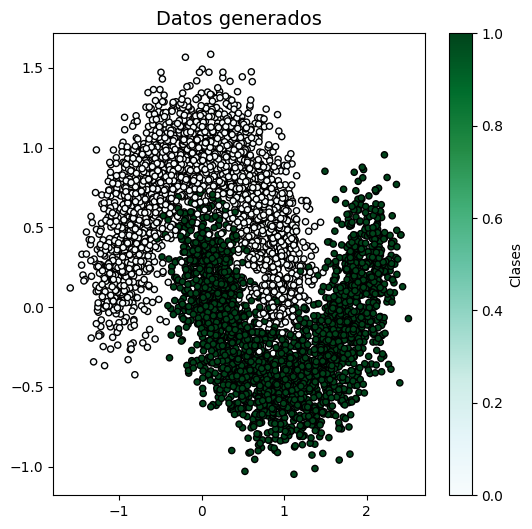

In [24]:
X, y = make_moons(n_samples=5000, noise=0.2, random_state=24)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='BuGn', s=20, edgecolor='k')
plt.title("Datos generados",size=14)
plt.colorbar(label="Clases")
plt.show()

Modificamos la función para crear el modelo para que las funciones de activiación y la función de pérdida se ingresen por entrada.

In [44]:
def build_model(activation, loss):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation=activation[0]))
  model.add(keras.layers.Dense(8, activation=activation[1]))
  model.add(keras.layers.Dense(1, activation = activation[2]))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

Definimos los datos de entrenamiento y de testeo y creamos el modelo.
Añadimos un ``` early_stopping ``` para que el entrenamiento se detenga si la precisión no mejora durante 20 epocas.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_start = time.time()
keras.backend.clear_session()

model = build_model(activation=['relu', 'relu', 'sigmoid'], loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1, callbacks=[early_stopping])

time_end = time.time()

Epoch 1/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3196 - loss: 0.8070 - val_accuracy: 0.2830 - val_loss: 0.7211
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 0.7074 - val_accuracy: 0.6330 - val_loss: 0.6827
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6740 - val_accuracy: 0.6460 - val_loss: 0.6542
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6599 - loss: 0.6465 - val_accuracy: 0.6780 - val_loss: 0.6265
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.6133 - val_accuracy: 0.7090 - val_loss: 0.5943
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7249 - loss: 0.5803 - val_accuracy: 0.7360 - val_loss: 0.5598
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.5548 - val_accuracy: 0.7590 - val_loss: 0.5263
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7542 - loss: 0.5266 - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.0819 
Test accuracy: 0.9679999947547913


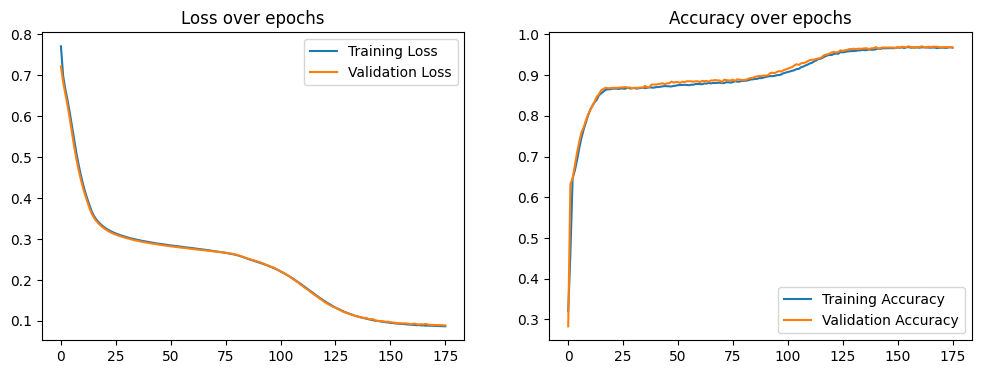

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Graficar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.show()

In [30]:
print(f'Tiempo total de entrenamiento: {time_end - time_start:.2f} segundos')
print(f'Tiempo total de entrenamiento: {(time_end - time_start) / 60:.2f} minutos')

Tiempo total de entrenamiento: 85.69 segundos
Tiempo total de entrenamiento: 1.43 minutos


2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

Modificamos la función de crear modelo. Modificamos la función de activación de la capa de salida por Softmax y modificamos las neuronas de cada capa.

In [45]:
def build_digits_model(activation, loss):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(128, input_shape=(64,), activation=activation[0]))
  model.add(keras.layers.Dense(128, activation=activation[1]))
  model.add(keras.layers.Dense(10, activation = activation[2]))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [47]:
# Cargar los datos usando load_digits
digits = load_digits()
X = digits.data
y = digits.target

X = X / 16.0
y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

time_start = time.time()
keras.backend.clear_session()

model = build_digits_model(activation=['relu', 'relu', 'softmax'], loss='categorical_crossentropy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1, callbacks=[early_stopping])

time_end = time.time()

Epoch 1/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1144 - loss: 2.2854 - val_accuracy: 0.2500 - val_loss: 2.2002
Epoch 2/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 2.1734 - val_accuracy: 0.5056 - val_loss: 2.0914
Epoch 3/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5550 - loss: 2.0677 - val_accuracy: 0.6806 - val_loss: 1.9803
Epoch 4/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6979 - loss: 1.9501 - val_accuracy: 0.7778 - val_loss: 1.8600
Epoch 5/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 1.8277 - val_accuracy: 0.8111 - val_loss: 1.7279
Epoch 6/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8226 - loss: 1.6950 - val_accuracy: 0.8417 - val_loss: 1.5873
Epoch 7/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8413 - loss: 1.5469 - val_accuracy: 0.8750 - val_loss: 1.4348
Epoch 8/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 1.3920 - val_accuracy: 0.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1337 
Test accuracy: 0.9638888835906982


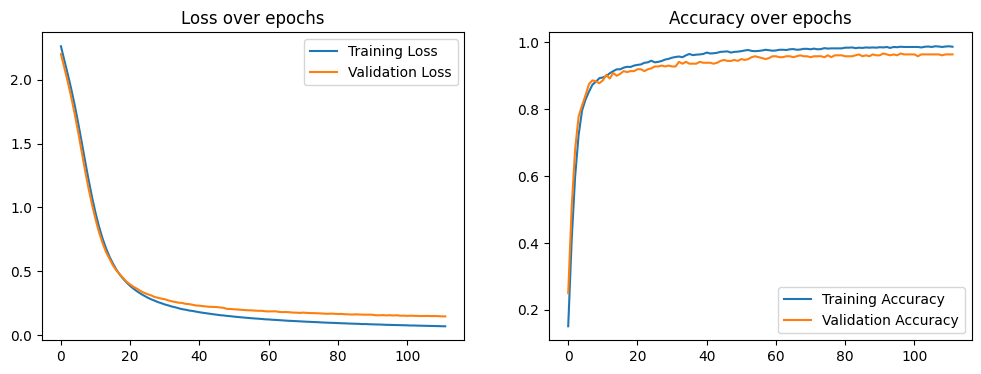

In [48]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Graficar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.show()

In [50]:
print(f'Tiempo total de entrenamiento: {time_end - time_start:.2f} segundos')
print(f'Tiempo total de entrenamiento: {(time_end - time_start) / 60:.2f} minutos')

Tiempo total de entrenamiento: 32.97 segundos
Tiempo total de entrenamiento: 0.55 minutos


Para los datos de entrenamiento el modelo presenta una buena exactitud.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


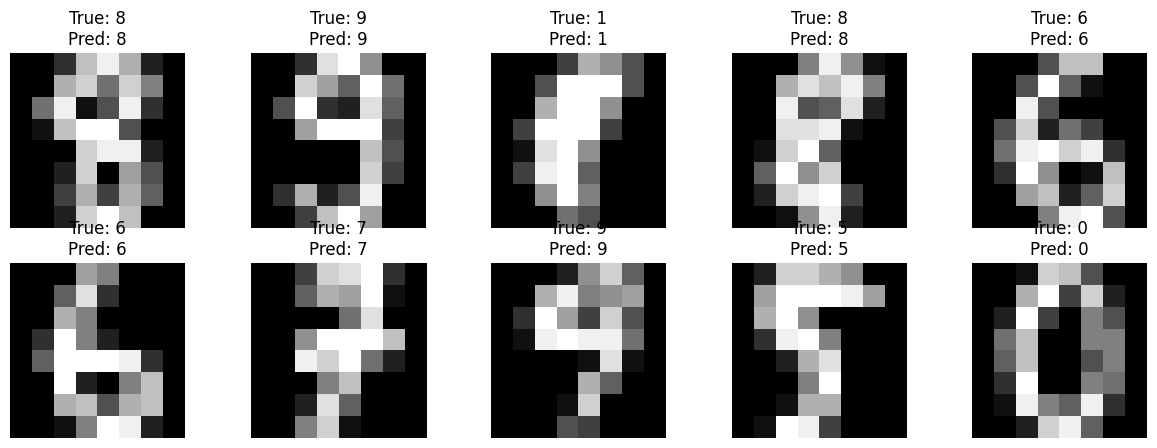

In [51]:
# Seleccionar 10 imágenes aleatorias del conjunto de entrenamiento
np.random.seed(42)  # Para reproducibilidad
indices = np.random.choice(X_train.shape[0], 10, replace=False)
X_sample = X_train[indices]
y_sample = y_train[indices]

# Predecir las clases para las imágenes seleccionadas
predictions = model.predict(X_sample)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_sample, axis=1)

# Mostrar las imágenes y las predicciones
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_sample[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')

plt.show()

Sin embargo para otros datos el modelo es muy deficiente. Aquí por ejemplo el resultado de las predicciones de 10 digitos escritos a mano por mí.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


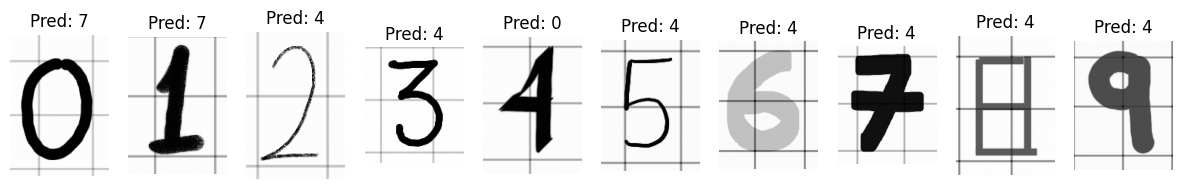

In [63]:
image_paths = ['/content/0.jpg','/content/1.jpg','/content/2.jpg','/content/3.jpg','/content/4.jpg',
               '/content/5.jpg','/content/6.jpg','/content/7.jpg','/content/8.jpg','/content/9.jpg']

predicciones = []

for i in range(len(image_paths)):
  img = Image.open(image_paths[i]).convert('L')
  img = img.resize((8, 8))
  img_array = np.array(img)
  img_array = img_array / 16.0
  X_custom = img_array.flatten()
  X_custom = X_custom.reshape(-1, 64)

  predictions = model.predict(X_custom)
  predicted_classes = np.argmax(predictions, axis=1)
  predicciones.append(predicted_classes[0])

plt.figure(figsize=(15, 5))
for i in range(0,len(image_paths)):
    plt.subplot(1, len(image_paths), i + 1)
    img = Image.open(image_paths[i]).convert('L')
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {predicciones[i]}")
    plt.axis('off')

plt.show()